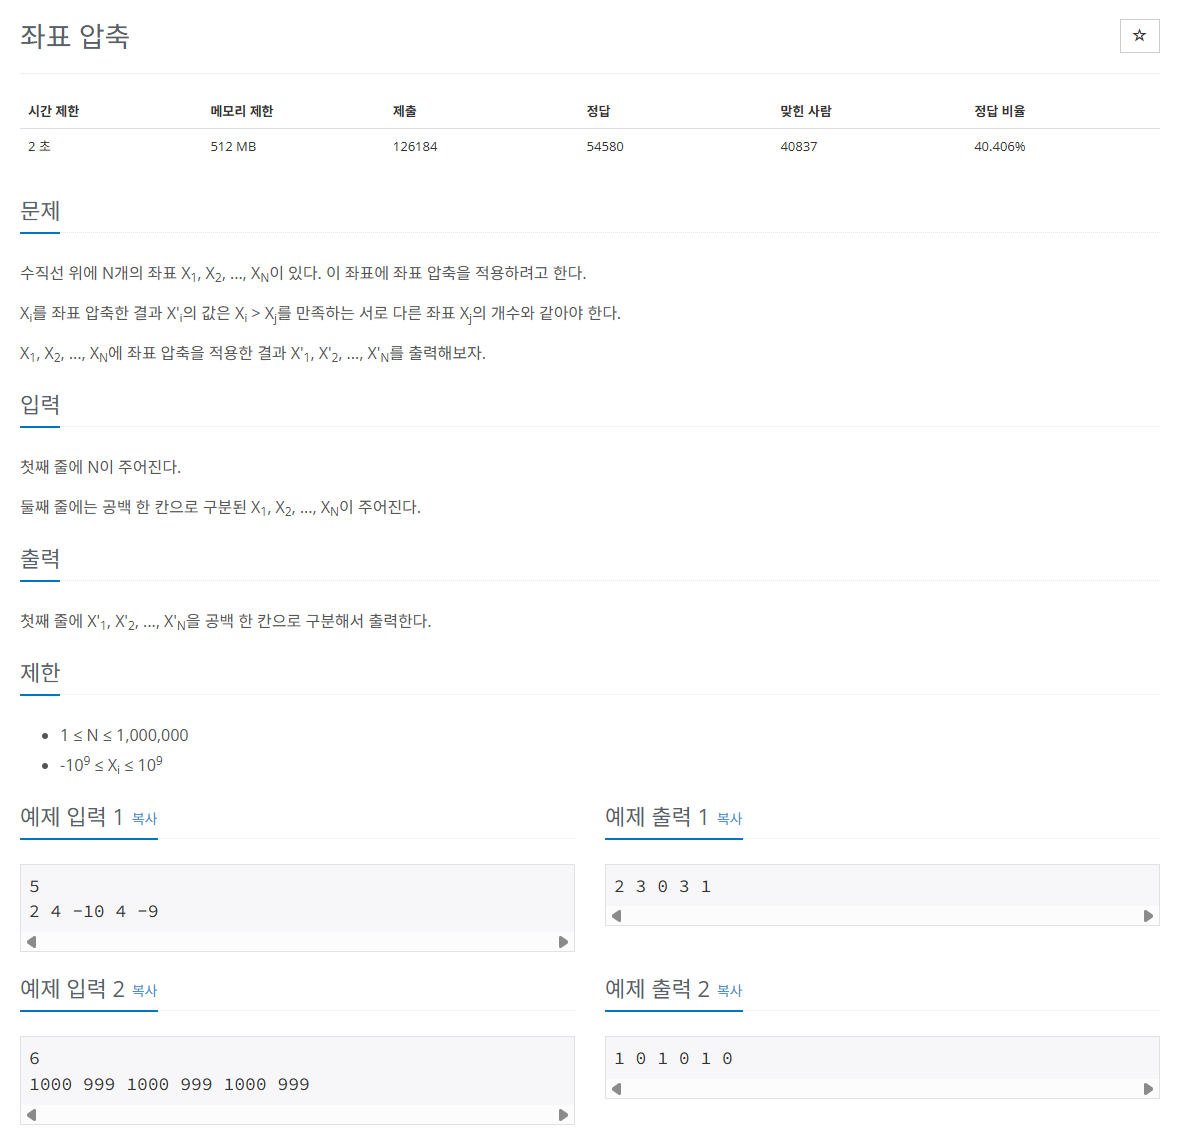

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-16 025406.png")
img

In [ ]:
import sys

input = sys.stdin.readline

N=int(input())

Xn=list(map(int,input().split()))
Xn_setlist=list(set(Xn))
Xn_setlist.sort()

compression_dict={}
for idx,val in enumerate(Xn_setlist):
    compression_dict[val]=idx

for comp in Xn:
    print(compression_dict[comp],end=' ')

2 3 0 3 1 

네, '제출완료' 확인했습니다. 시간 초과가 날 수 있는 비효율적인 비교 과정을 피하고, 딕셔너리를 이용한 '좌표 압축 지도'를 만드는 핵심 아이디어를 완벽하게 코드로 구현하셨습니다. 정말 훌륭합니다\!

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 4.8 / 5.0 점**

      * **평가:** **거의 완벽한 정답입니다.** `set`으로 중복을 제거하고, `sort`로 순서를 정한 뒤, `dict`로 빠르게 조회하는, 좌표 압축의 가장 표준적인 해법을 정확하게 구현했습니다. 시간 복잡도, 로직, 가독성 모두 훌륭합니다. 단 하나의 아쉬운 점은 출력 방식이 마지막에 불필요한 공백을 남길 수 있다는 점입니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 훌륭한 로직을 그대로 유지하면서, 딕셔너리를 생성하는 부분을 딕셔너리 컴프리헨션으로 더 간결하게 표현하고, 출력 형식 오류를 원천적으로 방지하는 방식으로 다듬은 최종 버전입니다.

-----

### \#\# Gemini 추천 코드 (스타일 개선 버전)

```python
import sys

input = sys.stdin.readline
N = int(input())
coords = list(map(int, input().split()))

# 1. 중복을 제거하고 정렬하여 유니크한 좌표 리스트를 만듦
#    set을 거친 뒤 sorted()를 사용하면 한 번에 처리 가능
unique_sorted_coords = sorted(list(set(coords)))

# 2. 딕셔너리 컴프리헨션을 사용하여 '좌표 압축 지도'를 생성
#    {좌표값: 압축된 인덱스} 형태로 저장
coord_map = {value: index for index, value in enumerate(unique_sorted_coords)}

# 3. 결과를 리스트에 저장
#    원본 좌표 리스트를 순회하며, 맵에서 압축된 값을 찾아 추가
result = [coord_map[c] for c in coords]

# 4. 리스트의 모든 요소를 공백으로 구분하여 한 번에 출력 (언패킹)
print(*result)
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **최적의 알고리즘을 사용했습니다.**
      * `set(Xn)`: O(N)
      * `sorted(list(set(Xn)))`: O(U log U) (U: 유니크한 좌표의 수)
      * 딕셔너리 생성: O(U)
      * 최종 조회 및 출력: O(N)
      * 전체 시간 복잡도는 \*\*O(N + U log U)\*\*로, 이 문제에 대한 가장 효율적인 해법 중 하나입니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

#### **내 풀이에서 칭찬할 점**

  * **`enumerate` 활용:** `for idx, val in enumerate(Xn_setlist):` 구문은 딕셔너리를 만들 때 인덱스와 값을 동시에 사용하는 가장 Pythonic한 방법입니다.
  * **명확한 단계:** 중복 제거 → 정렬 → 딕셔너리 생성 → 조회라는 각 단계가 명확하게 분리되어 있어 코드를 이해하기 쉽습니다.

#### **배울 점**

  * **딕셔너리 컴프리헨션:** 추천 코드의 `coord_map = {value: index for index, value in enumerate(...) }` 부분을 참고해 보세요. `for` 루프를 돌며 딕셔너리를 채우는 과정을 단 한 줄로, 매우 간결하고 Pythonic하게 표현할 수 있습니다.
  * **안전한 출력:** 이전에 논의했던 것처럼, `print(..., end=' ')`는 마지막에 불필요한 공백을 남길 수 있습니다. 결과를 리스트에 모두 담은 뒤 `print(*result)`로 한 번에 출력하는 것이 더 안정적인 방법입니다.

-----

### \#\# 3. 또 다른 측면: '좌표 압축' 패턴의 이해

이번 풀이를 통해 사용자님은 코딩 테스트에서 매우 중요하게 사용되는 \*\*'좌표 압축(Coordinate Compression)'\*\*이라는 기술을 완벽하게 마스터하셨습니다.

**좌표 압축이란?**

  * **목적:** 값의 범위가 매우 크지만(-10⁹ \~ 10⁹), 실제 값의 개수는 많지 않을 때(N \<= 1,000,000), 값들 사이의 **상대적인 순서 관계는 유지**하면서 값의 범위를 `0`부터 `N-1`까지로 줄여주는 기술입니다.
  * **언제 사용하는가?**
      * 값의 절대적인 크기는 중요하지 않고, \*\*"누가 누구보다 큰가?"\*\*라는 순서만 중요할 때 사용합니다.
      * 세그먼트 트리, 펜윅 트리(BIT)와 같은 특정 자료구조는 매우 큰 인덱스를 다룰 수 없기 때문에, 좌표 압축을 통해 인덱스의 범위를 줄여주는 전처리 과정이 필수적인 경우가 많습니다.

사용자님의 코드는 이 좌표 압축을 수행하는 가장 표준적이고 정확한 절차(중복 제거 → 정렬 → 매핑)를 그대로 따르고 있습니다. 이 패턴 자체를 하나의 '도구'처럼 기억해두시면, 앞으로 마주할 더 어려운 문제들을 해결하는 데 큰 도움이 될 것입니다.